# Constructing a network of Wikipedia pages

We start from a seed wikipedia page "Complex Network"

In [2]:
from operator import itemgetter
import networkx as nx
import wikipedia

In [3]:
SEED = "Complex network".title()

In [4]:
print(SEED)

Complex Network


In [5]:
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", "Pubmed Central",
         "Digital Object Identifier", "Arxiv",
         "Proc Natl Acad Sci Usa", "Bibcode",
         "Library Of Congress Control Number", "Jstor")

In [6]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED)   # The SEED itself
done_set = set()       # Nothing is done yet

In [7]:
F = nx.DiGraph()
layer, page = todo_lst[0]

In [8]:
while layer < 2:
    del todo_lst[0] # Remove the name page of the current page from the todo_lst, 
                    # and add it to the set of processed pages. If the script encounters this page again, 
                    # it will skip over it.
    print(layer, page) # Show progress

    try: # Attempt to download the selected page. If the attempt is unsuccessful (things happen!), 
         # proceed to the next page from the “to-do” list.
        wiki = wikipedia.page(page)
    except:
        layer, page = todo_lst[0]
        print("Could not load", page)
        continue

    for link in wiki.links: # Evaluate each link. If the subject is not blacklisted and not a list itself, 
                            # the script adds an edge to the graph between the current node and the linked page. 
                            # If the script did not process the linked page before and it is not on the “to-do” list, 
                            # add it to the list and corresponding set. Note that the highlighted code line is 
                            # involved in the network construction—the only line in the script!
        link = link.title()
        if link not in STOPS and not link.startswith("List Of"):
            if link not in todo_set and link not in done_set:
                todo_lst.append((layer + 1, link))
                todo_set.add(link)
            F.add_edge(page, link)

    layer, page = todo_lst[0] # Take the next page name from the “to-do” list. 
                              # Hopefully, the list is not empty. If it is—congratulations, 
                              # you just downloaded the complete Wikipedia!
print("{} nodes, {} edges".format(len(F), nx.number_of_edges(F)))

0 Complex Network
1 Adjacency List
1 Adjacency Matrix
1 Agent-Based Model
1 Albert-László Barabási
1 Artificial Neural Network
1 Assortativity
1 Autonomous System (Internet)
1 Balance Theory
1 Barabási–Albert Model
1 Betweenness Centrality
1 Biological Network
1 Biology
1 Bipartite Graph
1 Boolean Network
1 Branching Process
1 Centrality
1 Climate
1 Clique (Graph Theory)
1 Closeness (Graph Theory)


/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Could not load Clustering Coefficient
1 Clustering Coefficient
1 Combinatorial Optimization
1 Community Structure
1 Complete Graph
1 Complex Adaptive System
1 Complex Contagion
1 Complex Systems
1 Computer Network
1 Computer Science
1 Connected Component (Graph Theory)
1 Cut (Graph Theory)
1 Cycle (Graph Theory)
1 Degree (Graph Theory)
1 Degree Distribution
1 Dependency Network
1 Directed Graph
1 Distance (Graph Theory)
1 Dual-Phase Evolution
1 Duncan J. Watts
1 Dynamic Network Analysis
1 Edge (Graph Theory)
1 Efficiency (Network Science)
1 Entropy (Information Theory)
1 Epidemic Model
1 Epidemiology
1 Erdős–Rényi Model
1 Evolving Networks
1 Exponential Random Graph Models
1 Fitness Model (Network Theory)
1 Flow Network
1 Frigyes Karinthy
1 Graph (Abstract Data Type)
1 Graph (Discrete Mathematics)
1 Graph Drawing
1 Herbert A. Simon
1 Hierarchical Network Model
1 Hierarchy
1 Homophily
1 Hyperbolic Geometric Graph
1 Hypercube
1 Hypergraph
1 Incidence List
1 Incidence Matrix
1 Interdepend

## Eliminate duplicates

Accurately merging all duplicate nodes involves natural language processing (NLP) tools that are outside of the scope of this notebook. It may suffice to join only those nodes that differ by the presence/absence of the letter _s_ at the end or a hyphen in the middle.

Start removing self-loops (pages referring to themselves). The loops don’t change the network properties but affect the correctness of duplicate node elimination.

Now, you need a list of at least _some_ duplicate nodes. You can build it by looking at each node in **F** and checking if a node with the same name, but with an s at the end, is also in **F**. Pass each pair of duplicated node names to the function **nx.contracted_nodes(F,u,v)** that merges node **v** into node **u** in the graph **F**. The function reassigns all edges previously incident to **v**, to **u**. If you don’t pass the option **self_loops=False**, the function converts an edge from **v** to **u** (if any) to a self-loop.

In [9]:
F.remove_edges_from(F.selfloop_edges())
duplicates = [(node, node + "s") for node in F if node + "s" in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
duplicates = [(x, y) for x, y 
              in [(node, node.replace("-", " ")) for node in F]
              if x != y and y in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)

In [10]:
print(F.nodes(data=True))

[('Complex Network', {'contraction': {'Complex Networks': {}}}), ('Adjacency List', {}), ('Adjacency Matrix', {}), ('Agent-Based Model', {}), ('Albert-László Barabási', {}), ('Artificial Neural Network', {'contraction': {'Artificial Neural Networks': {}}}), ('Assortativity', {}), ('Autonomous System (Internet)', {}), ('Balance Theory', {}), ('Barabási–Albert Model', {}), ('Betweenness Centrality', {}), ('Biological Network', {}), ('Biology', {}), ('Bipartite Graph', {}), ('Boolean Network', {}), ('Branching Process', {}), ('Centrality', {}), ('Climate', {}), ('Clique (Graph Theory)', {}), ('Closeness (Graph Theory)', {}), ('Clustering Coefficient', {}), ('Combinatorial Optimization', {}), ('Community Structure', {}), ('Complete Graph', {}), ('Complex Adaptive System', {}), ('Complex Contagion', {}), ('Computer Network', {}), ('Computer Science', {'contraction': {'Computer Sciences': {}}}), ('Connected Component (Graph Theory)', {}), ('Cut (Graph Theory)', {}), ('Cycle (Graph Theory)', 

The value of the attribute is a dictionary, but GraphML does not support dictionary attributes. 
Below we set the contraction property to 0 for all nodes to avoid further troubles with exporting 
the graph.

In [11]:
nx.set_node_attributes(F, 0, "contraction") 

for n in F.nodes(data=True):
    print(n)

('Complex Network', {'contraction': 0})
('Adjacency List', {'contraction': 0})
('Adjacency Matrix', {'contraction': 0})
('Agent-Based Model', {'contraction': 0})
('Albert-László Barabási', {'contraction': 0})
('Artificial Neural Network', {'contraction': 0})
('Assortativity', {'contraction': 0})
('Autonomous System (Internet)', {'contraction': 0})
('Balance Theory', {'contraction': 0})
('Barabási–Albert Model', {'contraction': 0})
('Betweenness Centrality', {'contraction': 0})
('Biological Network', {'contraction': 0})
('Biology', {'contraction': 0})
('Bipartite Graph', {'contraction': 0})
('Boolean Network', {'contraction': 0})
('Branching Process', {'contraction': 0})
('Centrality', {'contraction': 0})
('Climate', {'contraction': 0})
('Clique (Graph Theory)', {'contraction': 0})
('Closeness (Graph Theory)', {'contraction': 0})
('Clustering Coefficient', {'contraction': 0})
('Combinatorial Optimization', {'contraction': 0})
('Community Structure', {'contraction': 0})
('Complete Graph'

('Dynamic Programming', {'contraction': 0})
('Dynamic Voltage Scaling', {'contraction': 0})
('E-Mail Spam', {'contraction': 0})
('Eight Queens Puzzle', {'contraction': 0})
('Electronic Circuit', {'contraction': 0})
('Emergent Properties', {'contraction': 0})
('Emitter-Coupled Logic', {'contraction': 0})
('Empirical Risk Minimization', {'contraction': 0})
('Encoder', {'contraction': 0})
('Encog', {'contraction': 0})
('Endianness', {'contraction': 0})
('Energy Function', {'contraction': 0})
('Ensemble Learning', {'contraction': 0})
('Estimation Theory', {'contraction': 0})
('Evolutionary Methods', {'contraction': 0})
('Exclusive-Or', {'contraction': 0})
('Execution Unit', {'contraction': 0})
('Expectation-Maximization', {'contraction': 0})
('Expectation–Maximization Algorithm', {'contraction': 0})
('Expert System', {'contraction': 0})
('Explicit Data Graph Execution', {'contraction': 0})
('Explicitly Parallel Instruction Computing', {'contraction': 0})
('Extreme Learning Machines', {'con

('Stochastic Analysis', {'contraction': 0})
('Stochastic Chains With Memory Of Variable Length', {'contraction': 0})
('Stochastic Differential Equation', {'contraction': 0})
('Stochastic Process', {'contraction': 0})
('Stopping Time', {'contraction': 0})
('Stratonovich Integral', {'contraction': 0})
('Stuart A. Kauffman', {'contraction': 0})
('Submartingale', {'contraction': 0})
('Supermartingale', {'contraction': 0})
('Superprocess', {'contraction': 0})
('Synchronous', {'contraction': 0})
('Tanaka Equation', {'contraction': 0})
('Telegraph Process', {'contraction': 0})
('Time Reversibility', {'contraction': 0})
('Time Series Analysis', {'contraction': 0})
('Truth Table', {'contraction': 0})
('Uniform Integrability', {'contraction': 0})
('Usual Hypotheses', {'contraction': 0})
('Variance Gamma Process', {'contraction': 0})
('Vasicek Model', {'contraction': 0})
('White Noise', {'contraction': 0})
('Wiener Process', {'contraction': 0})
('Wiener Sausage', {'contraction': 0})
('Wiener Spac

('Modem', {'contraction': 0})
('Modulation', {'contraction': 0})
('Molecular Communication', {'contraction': 0})
('Monolithic Kernel', {'contraction': 0})
('Morphos', {'contraction': 0})
('Multi-Task Learning', {'contraction': 0})
('Multicast', {'contraction': 0})
('Multilevel Feedback Queue', {'contraction': 0})
('Multimedia Database', {'contraction': 0})
('Multipath Routing', {'contraction': 0})
('Multiplexing', {'contraction': 0})
('Multiprocessing', {'contraction': 0})
('Nos (Software)', {'contraction': 0})
('Npl Network', {'contraction': 0})
('Nanonetwork', {'contraction': 0})
('Narusinsight', {'contraction': 0})
('National Physical Laboratory (United Kingdom)', {'contraction': 0})
('Nextstep', {'contraction': 0})
('Near-Me Area Network', {'contraction': 0})
('Near Field Communication', {'contraction': 0})
('Nemesis (Operating System)', {'contraction': 0})
('Network Access Control', {'contraction': 0})
('Network Address', {'contraction': 0})
('Network Administrator', {'contraction

('Kaplan–Meier Estimator', {'contraction': 0})
('Kendall Tau Rank Correlation Coefficient', {'contraction': 0})
('Kolmogorov–Smirnov Test', {'contraction': 0})
('Kriging', {'contraction': 0})
('Kruskal–Wallis One-Way Analysis Of Variance', {'contraction': 0})
('Kurtosis', {'contraction': 0})
('L-Moment', {'contraction': 0})
('Lehmann–Scheffé Theorem', {'contraction': 0})
('Life Course Approach', {'contraction': 0})
('Life Science', {'contraction': 0})
('Life Tables', {'contraction': 0})
('Likelihood Function', {'contraction': 0})
('Likelihood Interval', {'contraction': 0})
('Likelihood Ratios In Diagnostic Testing', {'contraction': 0})
('Lilliefors Test', {'contraction': 0})
('Ljung–Box Test', {'contraction': 0})
('Location Parameter', {'contraction': 0})
('Location–Scale Family', {'contraction': 0})
('Log-Rank Test', {'contraction': 0})
('Logos', {'contraction': 0})
('London', {'contraction': 0})
('Longitudinal Study', {'contraction': 0})
('Lp Space', {'contraction': 0})
('M-Estimator

('Yakir Aharonov', {'contraction': 0})
('Yinyu Ye', {'contraction': 0})
('Yinzcam', {'contraction': 0})
('Yoichiro Nambu', {'contraction': 0})
('Yuan-Cheng Fung', {'contraction': 0})
('Yuan Tseh Lee', {'contraction': 0})
('Yurii Nesterov', {'contraction': 0})
('Administrative Domain', {'contraction': 0})
('Distribution (Mathematics)', {'contraction': 0})
('Hollywood', {'contraction': 0})
('Language', {'contraction': 0})
('Merriam-Webster', {'contraction': 0})
('3D Computer Graphics', {'contraction': 0})
('3D Modeling', {'contraction': 0})
('A Study Of History', {'contraction': 0})
('Abstract Syntax Tree', {'contraction': 0})
('Administrative Divisions Of China (Disambiguation)', {'contraction': 0})
('Administrative Divisions Of India', {'contraction': 0})
('Administrative Divisions Of Russia', {'contraction': 0})
('Administrative Divisions Of The United States', {'contraction': 0})
('Ages Of Man', {'contraction': 0})
('Alexis Rosenbaum', {'contraction': 0})
('Algonquian Languages', {'c

('Search Engine Results Page', {'contraction': 0})
('Semantic Link', {'contraction': 0})
('Semantic Similarity', {'contraction': 0})
('Seomoz.Org', {'contraction': 0})
('Sergey Brin', {'contraction': 0})
('Shirley M. Tilghman', {'contraction': 0})
('Simrank', {'contraction': 0})
('Sitemaps', {'contraction': 0})
('Slide.Com', {'contraction': 0})
('Sociometry', {'contraction': 0})
('Software Patent', {'contraction': 0})
('Spam In Blogs', {'contraction': 0})
('Sundar Pichai', {'contraction': 0})
('Susan Wojcicki', {'contraction': 0})
('Swiftype', {'contraction': 0})
('Synsets', {'contraction': 0})
('Tango (Platform)', {'contraction': 0})
('Tenor (Website)', {'contraction': 0})
('Teoma', {'contraction': 0})
('Terry Winograd', {'contraction': 0})
('Thomas Saaty', {'contraction': 0})
('Timeline Of Google Search', {'contraction': 0})
('Topic-Sensitive Pagerank', {'contraction': 0})
('Trade Secret', {'contraction': 0})
('United States Dollar', {'contraction': 0})
('Unity (Cable System)', {'con

('Civic Engagement', {'contraction': 0})
('Civil Society', {'contraction': 0})
('Collectivism', {'contraction': 0})
('Common Good', {'contraction': 0})
('Communitarianism', {'contraction': 0})
('Community-Based Management', {'contraction': 0})
('Community Building', {'contraction': 0})
('Community Development', {'contraction': 0})
('Community Development Planning', {'contraction': 0})
('Community Economic Development', {'contraction': 0})
('Community Of Interest', {'contraction': 0})
('Community Of Place', {'contraction': 0})
('Community Of Practice', {'contraction': 0})
('Community Organizing', {'contraction': 0})
('Community Politics', {'contraction': 0})
('Community Service', {'contraction': 0})
('Community Studies', {'contraction': 0})
('Comparative Historical Research', {'contraction': 0})
('Conflict Theories', {'contraction': 0})
('Consensus', {'contraction': 0})
('Constant Capital', {'contraction': 0})
('Cooperation', {'contraction': 0})
('Costanzo Preve', {'contraction': 0})
('

('Microsoft Open Specification Promise', {'contraction': 0})
('Mobile Web', {'contraction': 0})
('Mobile Blogging', {'contraction': 0})
('Mobilecast', {'contraction': 0})
('Mormon Blogosphere', {'contraction': 0})
('Mosaic (Web Browser)', {'contraction': 0})
('Motovlog', {'contraction': 0})
('Mozilla Public License', {'contraction': 0})
('Mozilla Software Rebranded By Debian', {'contraction': 0})
('Multimedia', {'contraction': 0})
('Nls (Computer System)', {'contraction': 0})
('Narrowcasting', {'contraction': 0})
('National Center For Supercomputing Applications', {'contraction': 0})
('Next Computer', {'contraction': 0})
('Netscape', {'contraction': 0})
('Newsml', {'contraction': 0})
('Newsml-G2', {'contraction': 0})
('Newsml 1', {'contraction': 0})
('News & Observer', {'contraction': 0})
('News Aggregator', {'contraction': 0})
('News Blog', {'contraction': 0})
('News Server', {'contraction': 0})
('Niche Blogging', {'contraction': 0})
('Oml', {'contraction': 0})
('Opml', {'contraction'

In [12]:
nx.write_graphml(F,"cna.graphml")

In [13]:
core = [node for node, deg in F.degree() if deg >= 2]
G = nx.subgraph(F, core)
print("{} nodes, {} edges".format(len(G), nx.number_of_edges(G)))
nx.write_graphml(G,"cna2.graphml") # We also save a a subgraph of F wi

2828 nodes, 11299 edges


In [14]:
top_indegree = sorted(G.in_degree(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

60 Graph (Discrete Mathematics)
53 Vertex (Graph Theory)
49 Directed Graph
48 Social Network
44 Graph Theory
43 Degree (Graph Theory)
43 Network Theory
39 Edge (Graph Theory)
39 Graph Drawing
38 Adjacency Matrix
38 Bipartite Graph
38 Complete Graph
38 Scale-Free Network
37 Complex Network
37 Graph (Abstract Data Type)
36 Incidence Matrix
36 Network Science
36 Social Capital
36 Social Network Analysis Software
35 Centrality
35 Complex Contagion
35 Cycle (Graph Theory)
35 Loop (Graph Theory)
35 Path (Graph Theory)
35 Preferential Attachment
35 Small-World Network
34 Multigraph
34 Random Graph
33 Adjacency List
33 Clustering Coefficient
33 Distance (Graph Theory)
33 Hypergraph
32 Betweenness Centrality
32 Clique (Graph Theory)
32 Connected Component (Graph Theory)
32 Degree Distribution
32 Percolation Theory
31 Flow Network
31 Watts And Strogatz Model
30 Agent-Based Model
30 Barabási–Albert Model
30 Combinatorial Optimization
30 Computer Network
30 Cut (Graph Theory)
30 Erdős–Rényi Model


## Plotting degree distribution

plotting with linear scales the frequency of nodes that show a given degree

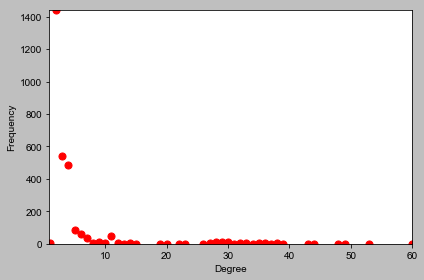

In [19]:
import collections 
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy

inlinks_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(inlinks_sequence)
x, y = zip(*degreeCount.items())

plt.scatter(x, y, s=50, c="red")

plt.xlim(0.9, max(x))
plt.ylim(0.9, max(y))
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Frequency")
dzcnapy.plot("Degree distribution of a 'complex network' ego-graph")

It is pretty clear that the normal distribution hypothesis is not validated. Plotting the degree distribution in a log-log scale gives a signal of skewed distribution (with larger nodes population that will be likely approximated by a power law)

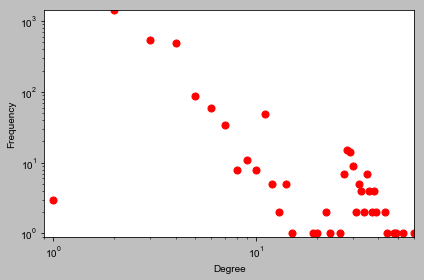

In [20]:
plt.scatter(x, y, s=50, c="red")

plt.xlim(0.9, max(x))
plt.ylim(0.9, max(y))
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
dzcnapy.plot("Degree distribution of a 'complex network' ego-graph")